# Create model (CNN) and save it

#### imports

In [22]:
import numpy as np
import keras
import matplotlib.pyplot as plt

#### set parameters

In [23]:
num_classes = 10

#### load data

In [24]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [25]:
x_train.shape

(60000, 28, 28)

#### scale pictures to [0, 1] range

In [26]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#### show example of data

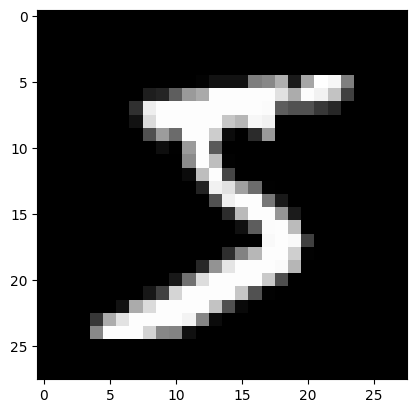

In [27]:
plt.imshow(x_train[0].reshape(28,28), cmap='gray')

#### convert class vectors to binary class metrics

In [28]:
y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=num_classes)

## MLP (Multi-Layer Perceptron)

#### Transform pictures to vectors

In [11]:
x_train_simple = x_train.reshape(-1, 28 * 28)
x_test_simple = x_test.reshape(-1, 28 * 28)

#### Define model

In [8]:
model_simple = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation="softmax"),  # 10 classes for digits 0-9
])

/Users/grundaim/Library/CloudStorage/OneDrive-adidas/Documents/DHBW/Grundlagen_DSKI/project_mnist_dataset/project_dski_mnist_dataset/venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile model

In [9]:
model_simple.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

#### Train model

In [12]:
model_simple.fit(x_train_simple, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.8320 - loss: 1.7046 - val_accuracy: 0.9148 - val_loss: 0.3363
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - accuracy: 0.9105 - loss: 0.3450 - val_accuracy: 0.9230 - val_loss: 0.2874
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.9353 - loss: 0.2436 - val_accuracy: 0.9515 - val_loss: 0.1749
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 939us/step - accuracy: 0.9481 - loss: 0.1904 - val_accuracy: 0.9522 - val_loss: 0.1698
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 900us/step - accuracy: 0.9561 - loss: 0.1578 - val_accuracy: 0.9623 - val_loss: 0.1477


#### Evaluate model

In [ ]:
test_loss, test_acc = model_simple.evaluate(x_test_simple, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.9758 - loss: 0.0873
Test accuracy: 0.9758


#### Save model

In [25]:
model_simple.save('./models/mnist_model_simple.keras')

## CNN

#### check shape (28, 28, 1)

In [29]:
x_test = np.expand_dims(x_test, -1)
x_train = np.expand_dims(x_train, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### Build model

In [30]:
model = keras.Sequential(
    [
        keras.Input(shape=[28, 28, 1]),
        keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,810 (50.04 KB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 0 (0.00 B)

#### train model

In [31]:
batch_size = 128
epochs = 15

In [32]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8422 - loss: 0.5045 - val_accuracy: 0.9715 - val_loss: 0.1097
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9504 - loss: 0.1627 - val_accuracy: 0.9807 - val_loss: 0.0755
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9635 - loss: 0.1224 - val_accuracy: 0.9845 - val_loss: 0.0572
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9681 - loss: 0.1027 - val_accuracy: 0.9865 - val_loss: 0.0515
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9718 - loss: 0.0931 - val_accuracy: 0.9868 - val_loss: 0.0483
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9738 - loss: 0.0839 - val_accuracy: 0.9888 - val_loss: 0.0428
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9756 - loss: 0.0775 - val_accuracy: 0.9895 - val_loss: 0.0400
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9771 - loss: 0.0737 - val_accuracy: 0.

#### evaluate model

In [33]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03062150627374649
Test accuracy: 0.9900000095367432


#### save model

In [34]:
model.save('./models/mnist_model1.keras')

### Optimizing model

In [12]:
import optuna

In [ ]:
def objective(trial):

    # hyperparameters to tune
    conv1_filters = trial.suggest_categorical("conv1_filters", [16, 32, 64])
    conv2_filters = trial.suggest_categorical("conv2_filters", [32, 64, 128])
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "elu"])
    dropout_rate = trial.suggest_float("dropout_rate", 0.2, 0.6)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    optimizer_name = trial.suggest_categorical("optimizer", ["adam", "rmsprop", "sgd"])

    # define model
    model = keras.Sequential([
        keras.Input(shape=[28, 28, 1]),
        keras.layers.Conv2D(conv1_filters, kernel_size=(3, 3), activation=activation),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(conv2_filters, kernel_size=(3, 3), activation=activation),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(num_classes, activation="softmax"),
    ])

    # choose optimizer
    if optimizer_name == "adam":
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == "rmsprop":
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

    model.compile(optimizer=optimizer,
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

    # training (shorter for optimization purposes)
    history = model.fit(
        x_train, y_train,
        validation_split=0.2,
        epochs=5,
        batch_size=128,
        verbose=0
    )

    # best validation accuracy
    val_acc = max(history.history["val_accuracy"])
    
    return val_acc

In [14]:
# start optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, timeout=3600)  # 30 trials or 1 hour

[I 2025-11-11 15:16:27,436] A new study created in memory with name: no-name-2e4cee54-d55a-4247-85a7-b619d0a9ea34
[I 2025-11-11 15:16:47,961] Trial 0 finished with value: 0.9818333387374878 and parameters: {'conv1_filters': 16, 'conv2_filters': 64, 'activation': 'relu', 'dropout_rate': 0.47892586324724046, 'learning_rate': 0.008262622473908987, 'optimizer': 'sgd'}. Best is trial 0 with value: 0.9818333387374878.
[I 2025-11-11 15:17:48,441] Trial 1 finished with value: 0.9806666374206543 and parameters: {'conv1_filters': 64, 'conv2_filters': 64, 'activation': 'elu', 'dropout_rate': 0.27796168988982933, 'learning_rate': 0.0002924812738522231, 'optimizer': 'adam'}. Best is trial 0 with value: 0.9818333387374878.
[I 2025-11-11 15:18:45,610] Trial 2 finished with value: 0.9680833220481873 and parameters: {'conv1_filters': 64, 'conv2_filters': 64, 'activation': 'elu', 'dropout_rate': 0.20050728477406496, 'learning_rate': 0.0022980569081564825, 'optimizer': 'sgd'}. Best is trial 0 with value:

In [15]:
# print best parameters
print("Best Parameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")
print(f"\nBest Validation Accuracy: {study.best_value:.4f}")


Best Parameters:
  conv1_filters: 32
  conv2_filters: 128
  activation: relu
  dropout_rate: 0.29115072828844096
  learning_rate: 0.0029455035210782946
  optimizer: rmsprop

Best Validation Accuracy: 0.9905


In [16]:
best_params = study.best_params

In [ ]:
final_model = keras.Sequential([
    keras.Input(shape=[28, 28, 1]),
    keras.layers.Conv2D(best_params["conv1_filters"], kernel_size=(3, 3), activation=best_params["activation"]),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(best_params["conv2_filters"], kernel_size=(3, 3), activation=best_params["activation"]),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(best_params["dropout_rate"]),
    keras.layers.Dense(num_classes, activation="softmax"),
])

In [18]:
opt_name = best_params["optimizer"]
lr = best_params["learning_rate"]
if opt_name == "adam":
    optimizer = keras.optimizers.Adam(lr)
elif opt_name == "rmsprop":
    optimizer = keras.optimizers.RMSprop(lr)
else:
    optimizer = keras.optimizers.SGD(lr, momentum=0.9)

In [19]:
final_model.compile(optimizer=optimizer,
                    loss="categorical_crossentropy",
                    metrics=["accuracy"])

In [20]:
final_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9512 - loss: 0.1571 - val_accuracy: 0.9861 - val_loss: 0.0394
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9836 - loss: 0.0534 - val_accuracy: 0.9877 - val_loss: 0.0336
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9876 - loss: 0.0399 - val_accuracy: 0.9902 - val_loss: 0.0287
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9894 - loss: 0.0333 - val_accuracy: 0.9899 - val_loss: 0.0306
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9914 - loss: 0.0277 - val_accuracy: 0.9916 - val_loss: 0.0251
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9919 - loss: 0.0250 - val_accuracy: 0.9920 - val_loss: 0.0232
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9928 - loss: 0.0230 - val_accuracy: 0.9899 - val_loss: 0.0320
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9931 - loss: 0.0216 - 

In [21]:
score = final_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.029834212735295296
Test accuracy: 0.9909999966621399


In [23]:
final_model.save('./models/mnist_model_optimized.keras')